## Table of Contents
    
1. [Task 1](#Task-1)
2. [Task 2](#Task-2)
3. [Task 3](#Task-3)
4. [Task 4](#Task-4)

------

# Task 1

## Import Modules

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from bs4 import BeautifulSoup

## Read CSV Files (Loops)

In [2]:
# get current directory
os.getcwd()

'/home/siavash/JAM'

In [3]:
# list files in current directory
os.listdir()

['new.xml',
 'Modified_XMLs',
 'Scientist_Testdata',
 '.ipynb_checkpoints',
 'JAM_Project.ipynb',
 'technical test.pdf']

In [4]:
# build path for directory containing datasets
datasets_path =  os.path.join(os.getcwd(), 'Scientist_Testdata')
os.listdir(datasets_path)

['Mix-Packs', 'XML-Projects']

In [5]:
Mix_Packs_path =  os.path.join(datasets_path, 'Mix-Packs')
XML_Projects_path =  os.path.join(datasets_path, 'XML-Projects')

In [6]:
# create an empty list to store dataframes in
lst=[]
# use os.walk(path) on the main path to get ALL subfolders inside path
for root,dirs,_ in os.walk(Mix_Packs_path):
    for d in dirs:
        path_sub = os.path.join(root,d)
        for filename in glob.glob(os.path.join(path_sub, '*.csv')):
            data = pd.read_csv(filename)
            lst.append(data)

In [7]:
print('Number of csv files:', len(lst))

Number of csv files: 691


**691 csv files are read!**

In [8]:
df= pd.concat(lst).reset_index(drop=True)

In [9]:
df.head()

Id                                     Filename  Label        d1  \
0  1138  Mix Packs/ST_House_Lite/Drums Solo/Sticky G    0.6  0.599279   
1  1139   Mix Packs/ST_House_Lite/Drums Solo/Drake E    0.6  0.074677   
2  1137  Mix Packs/ST_House_Lite/Drums Solo/Sticky I    0.6  0.606921   
3  1136   Mix Packs/ST_House_Lite/Drums Solo/Drake F    0.6  0.636463   
4  1244     Mix Packs/ST_House_Lite/Synth/Electral 3    0.8  0.632452   

         d2        d3        d4        d5        d6        d7        d8  
0  0.112469  0.454564  0.626869  0.173946  0.784603  0.482430  0.344764  
1  0.222533  0.435373  0.525339  0.361440  0.593404  0.419788  0.658412  
2  0.184086  0.565232  0.697546  0.276072  0.770473  0.462950  0.421079  
3  0.292706  0.725393  0.747072  0.387884  0.687162  0.440790  0.478673  
4  0.364120  0.628142  0.454776  0.448569  0.611899  0.593052  0.549514

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        691 non-null    int64  
 1   Filename  691 non-null    object 
 2   Label     691 non-null    float64
 3   d1        691 non-null    float64
 4   d2        691 non-null    float64
 5   d3        691 non-null    float64
 6   d4        691 non-null    float64
 7   d5        691 non-null    float64
 8   d6        691 non-null    float64
 9   d7        691 non-null    float64
 10  d8        691 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 59.5+ KB


In [11]:
df.describe()

Id       Label          d1          d2          d3  \
count   691.000000  691.000000  691.000000  691.000000  691.000000   
mean   1260.115774    0.544284    0.611177    0.378038    0.513777   
std     563.611281    0.276953    0.188114    0.129407    0.109792   
min     709.000000    0.100000    0.074677    0.076128    0.184851   
25%     881.500000    0.300000    0.526732    0.292684    0.448546   
50%    1054.000000    0.600000    0.677242    0.367393    0.509337   
75%    1226.500000    0.800000    0.732434    0.465593    0.591090   
max    2402.000000    0.900000    0.919163    0.751117    0.813182   

               d4          d5          d6          d7          d8  
count  691.000000  691.000000  691.000000  691.000000  691.000000  
mean     0.519806    0.353849    0.544930    0.492898    0.552098  
std      0.110781    0.101917    0.115305    0.092100    0.109731  
min      0.278554    0.087499    0.010000    0.256229    0.155272  
25%      0.440959    0.299331    0.490928    0.433157    0.498762  
50%      0.497327    0.337325    0.559397    0.482687    0.555344  
75%      0.587611    0.387283    0.619114    0.544840    0.619128  
max      0.992259    0.692974    0.826909    0.879426    0.904868

In [12]:
df.nunique()

Id          691
Filename    691
Label         9
d1          691
d2          691
d3          691
d4          691
d5          691
d6          691
d7          691
d8          691
dtype: int64

In [13]:
df['Filename'].apply(lambda x: x.split('/')[1])

0       ST_House_Lite
1       ST_House_Lite
2       ST_House_Lite
3       ST_House_Lite
4       ST_House_Lite
            ...      
686    ST_Electro_Pop
687    ST_Electro_Pop
688    ST_Electro_Pop
689    ST_Electro_Pop
690    ST_Electro_Pop
Name: Filename, Length: 691, dtype: object

In [14]:
df['Mix_Packs']= df['Filename'].apply(lambda x: x.split('/')[1])
df['Instrument']= df['Filename'].apply(lambda x: x.split('/')[2])
df['loop_name']= df['Filename'].apply(lambda x: x.split('/')[3])

In [15]:
df.head()

Id                                     Filename  Label        d1  \
0  1138  Mix Packs/ST_House_Lite/Drums Solo/Sticky G    0.6  0.599279   
1  1139   Mix Packs/ST_House_Lite/Drums Solo/Drake E    0.6  0.074677   
2  1137  Mix Packs/ST_House_Lite/Drums Solo/Sticky I    0.6  0.606921   
3  1136   Mix Packs/ST_House_Lite/Drums Solo/Drake F    0.6  0.636463   
4  1244     Mix Packs/ST_House_Lite/Synth/Electral 3    0.8  0.632452   

         d2        d3        d4        d5        d6        d7        d8  \
0  0.112469  0.454564  0.626869  0.173946  0.784603  0.482430  0.344764   
1  0.222533  0.435373  0.525339  0.361440  0.593404  0.419788  0.658412   
2  0.184086  0.565232  0.697546  0.276072  0.770473  0.462950  0.421079   
3  0.292706  0.725393  0.747072  0.387884  0.687162  0.440790  0.478673   
4  0.364120  0.628142  0.454776  0.448569  0.611899  0.593052  0.549514   

       Mix_Packs  Instrument   loop_name  
0  ST_House_Lite  Drums Solo    Sticky G  
1  ST_House_Lite  Drums Solo     Drake E  
2  ST_House_Lite  Drums Solo    Sticky I  
3  ST_House_Lite  Drums Solo     Drake F  
4  ST_House_Lite       Synth  Electral 3

In [16]:
df.nunique()

Id            691
Filename      691
Label           9
d1            691
d2            691
d3            691
d4            691
d5            691
d6            691
d7            691
d8            691
Mix_Packs       4
Instrument     18
loop_name     691
dtype: int64

**4 unique Mix Packs!**\
**18 unique instruments!**\
**All loops have unique names!**

## Read XML Files (Projects)

In [17]:
# create empty lists to store xml files in
xml_lst_str=[]
xml_lst=[]
filenames= os.listdir(XML_Projects_path)
# create a file path for each xml file
for filename in filenames:
    xml_file_path= os.path.join(XML_Projects_path,filename)
    # read xml file
    with open(xml_file_path) as f:
        xml_string = f.read()
        xml_lst_str.append(xml_string)
    # append xml to list
    xml_lst.append(BeautifulSoup(xml_string, 'xml'))

In [18]:
print('Number of imported projects:',len(xml_lst))

Number of imported projects: 100


**Generating a simplified tree view of XML files structure**

In [19]:
# import libraries
import re, collections
from lxml import etree
# parse a sample xml
xml_root = etree.fromstring(xml_lst_str[0])
raw_tree = etree.ElementTree(xml_root)
nice_tree = collections.OrderedDict()
# loop through each tag
for tag in xml_root.iter():
    path = re.sub('\[[0-9]+\]', '', raw_tree.getpath(tag))
    if path not in nice_tree:
        nice_tree[path] = []
    if len(tag.keys()) > 0:
        nice_tree[path].extend(attrib for attrib in tag.keys() if attrib not in nice_tree[path])            
# create indentation and print result
print()
for path, attribs in nice_tree.items():
    indent = int(path.count('/') - 1)
    print('{0}{1}: {2} [{3}]'.format('    ' * indent, indent, path.split('/')[-1],
                                     ', '.join(attribs) if len(attribs) > 0 else '-'))


0: project [volume, bpm, cut_mode]
    1: used_chords [-]
    1: user_loops [-]
        2: loop [id, name, bpm, length_in_beats, path]
    1: parts [selected_index]
        2: part [pitch, length_in_beats, name]
            3: channels [-]
                4: channel [loop, volume, is_active]
            3: chord_sequence [-]


We create a dataframe for each project (XML File) and store parts data in it. In addition, we create a single dataframe for all of the projects (all XML Files) in which each row represent the statistics of one project. This helps us to compare projects with each other and to find desired statistics.

In [20]:
# empty list for storing project parts dataframe
all_project_parts_df=[]
# empty list for storing all of the project data and to concat them together 
all_projects_df=[]

for index in range(len(xml_lst)):

    # Find unique loops in each project
    # list for unique loops including user recordings
    all_loops_lst=[]
    # list for unique loops out of JAM libraries
    JAM_loops_lst=[]
    for channel in xml_lst[index].find_all('channel'):
        if channel.attrs['loop']!='':
            all_loops_lst.append(channel.attrs['loop'])
            if 'user_loops' not in channel.attrs['loop']:
                JAM_loops_lst.append(channel.attrs['loop'])

    # Find average number of active channels per part
    active_ch=[]
    for channel in xml_lst[index].find_all('channel'):
        active_ch.append(channel.attrs['is_active'])

    # Find average length in beats per part    
    length_in_beats_parts_lst=[]
    for part in xml_lst[index].find_all('part'):
        length_in_beats_parts_lst.append(int(part.attrs['length_in_beats']))    

    # Store related data in a dataframe for each project
    project_df= pd.DataFrame(data={'project_name': filenames[index],
                'volume':int(xml_lst[index].project.attrs['volume']),
                'bpm':int(xml_lst[index].project.attrs['bpm']),
                'cut_mode':xml_lst[index].project.attrs['cut_mode'],
                'num_parts':len(xml_lst[index].find_all('part')),
                'num_user_loops':len(xml_lst[index].find_all('loop')),
                'num_all_unique_loops':len(set(all_loops_lst)),
                'num_JAM_unique_loops':len(set(JAM_loops_lst)),
                'avg_active_channels_per_part':round(active_ch.count('true')/len(xml_lst[index].find_all('part')),2),
                'avg_len_in_beats':np.mean(length_in_beats_parts_lst)}, index=[index])

    # append the project info df to the list
    all_projects_df.append(project_df)
    # concat all of the list items together
    all_projects=pd.concat(all_projects_df)
    
    
    # we create a single-row df for each part of a project (containing channel info)
    # store these rows in this empty list and then concatenate them to build the project df
    project_parts_single_row_df=[]
    # loop through each part of the project
    for idx, part in enumerate(xml_lst[index].find_all('part')):
        # part index
        part_index='part '+ str(idx)
        # single-row df representing part
        part_row_df= pd.DataFrame(data={'part':part_index,
                                        'name':part.attrs['name'],
                                        'pitch':part.attrs['pitch'],
                                        'length_in_beats':part.attrs['length_in_beats']},
                                         index=[idx])
        # extract 8 channels data for each part
        for ch_idx, channel in enumerate(part.find_all('channel')):
            # create columns for channels  
            ch_idx+=1
            ch_loop_col= 'ch'+str(ch_idx)+'_loop'
            ch_loop_is_user_loop_col= 'ch'+str(ch_idx)+'_is_user_loop'
            ch_loop_mix_pack_col= 'ch'+str(ch_idx)+'_loop_mix_pack'    
            ch_loop_instrument_col= 'ch'+str(ch_idx)+'_loop_instrument'
            ch_loop_name_col= 'ch'+str(ch_idx)+'_loop_name'
            ch_is_actice_col= 'ch'+str(ch_idx)+'__is_actice'
            ch_volume_col= 'ch'+str(ch_idx)+'_volume'
            # create values for channels
            ch_loop_val= channel.attrs['loop']
            ch_loop_is_user_loop_val= 'user_loops' in channel.attrs['loop']
            if ch_loop_is_user_loop_val or channel.attrs['loop']=='':
                ch_loop_mix_pack_val= np.nan
                ch_loop_instrument_val= np.nan
                ch_loop_name_val= np.nan
            else:
                ch_loop_mix_pack_val= channel.attrs['loop'].split('/')[-3]
                ch_loop_instrument_val= channel.attrs['loop'].split('/')[-2]
                ch_loop_name_val= channel.attrs['loop'].split('/')[-1]
            ch_is_actice_val= 'true' in channel.attrs['is_active']
            ch_volume_val= channel.attrs['volume']        
            # df for each channel
            chans_df= pd.DataFrame({ch_loop_col:ch_loop_val,
                                   ch_loop_is_user_loop_col:ch_loop_is_user_loop_val,
                                   ch_loop_mix_pack_col:ch_loop_mix_pack_val,
                                   ch_loop_instrument_col:ch_loop_instrument_val,
                                   ch_loop_name_col:ch_loop_name_val,
                                   ch_is_actice_col:ch_is_actice_val,
                                   ch_volume_col:ch_volume_val}, index=[idx])    
            # concatenate all channels data of a part together with the part info
            part_row_df= pd.concat([part_row_df, chans_df], axis=1)
        # append row dataframes to the list
        project_parts_single_row_df.append(part_row_df)
    # concatenate all rows to form the df for the project 
    project_parts_df= pd.concat(project_parts_single_row_df)
    # append project part df to the ist
    all_project_parts_df.append(project_parts_df)

In [21]:
# check dataframe containing all of the projects info
all_projects.head()

project_name  volume  bpm cut_mode  num_parts  \
0  03b5435d-91cd-11e9-99f7-064f3e9f608e.xml      50  120     Beat         29   
1  d87b7042-abe4-11e9-99f7-064f3e9f608e.xml     100  120     Beat         21   
2  aa770847-f0f3-11e9-99f7-064f3e9f608e.xml     100  118     Beat         29   
3  d8abc397-55ad-11e9-99f7-064f3e9f608e.xml      56  107     Beat         19   
4  0d3765c8-1419-11ea-99f7-064f3e9f608e.xml      19  120     Beat         16   

   num_user_loops  num_all_unique_loops  num_JAM_unique_loops  \
0              10                    20                    12   
1               1                    11                    10   
2               0                    10                    10   
3               0                    12                    12   
4               0                    26                    26   

   avg_active_channels_per_part  avg_len_in_beats  
0                          3.34         15.586207  
1                          3.05         16.000000  
2                          6.90         10.896552  
3                          4.84         21.894737  
4                          2.62         32.000000

In [22]:
# check indicidual project parts dataframe
# we look at the first one as a sample
all_project_parts_df[0].head()

part   name pitch length_in_beats  \
0  part 0      A     0              16   
1  part 1  A (1)     0              16   
2  part 2  A (2)     0              16   
3  part 3  A (3)     0              16   
4  part 4  A (4)     0              16   

                                      ch1_loop  ch1_is_user_loop  \
0  mmj://styles/id/ST_House_Lite/Drums/Drake C             False   
1  mmj://styles/id/ST_House_Lite/Drums/Drake A             False   
2  mmj://styles/id/ST_House_Lite/Drums/Drake A             False   
3  mmj://styles/id/ST_House_Lite/Drums/Drake A             False   
4  mmj://styles/id/ST_House_Lite/Drums/Drake A             False   

  ch1_loop_mix_pack ch1_loop_instrument ch1_loop_name  ch1__is_actice  ...  \
0     ST_House_Lite               Drums       Drake C            True  ...   
1     ST_House_Lite               Drums       Drake A            True  ...   
2     ST_House_Lite               Drums       Drake A            True  ...   
3     ST_House_Lite               Drums       Drake A            True  ...   
4     ST_House_Lite               Drums       Drake A            True  ...   

  ch7_loop_name ch7__is_actice  ch7_volume  \
0           NaN          False          50   
1           NaN          False          50   
2           NaN          False          50   
3           NaN          False          50   
4           NaN          False          50   

                                            ch8_loop ch8_is_user_loop  \
0                                                               False   
1  mmj://projects/this/user_loops/id/1a59a58e-20d...             True   
2  mmj://projects/this/user_loops/id/782417bb-5c6...             True   
3  mmj://projects/this/user_loops/id/cd191549-a34...             True   
4                                                               False   

  ch8_loop_mix_pack  ch8_loop_instrument ch8_loop_name ch8__is_actice  \
0               NaN                  NaN           NaN          False   
1               NaN                  NaN           NaN           True   
2               NaN                  NaN           NaN           True   
3               NaN                  NaN           NaN           True   
4               NaN                  NaN           NaN          False   

   ch8_volume  
0          69  
1           0  
2           0  
3           0  
4          50  

[5 rows x 60 columns]

In [23]:
# describe methode on all projects df
all_projects.describe(include='all')

project_name      volume         bpm  \
count                                        100  100.000000  100.000000   
unique                                       100         NaN         NaN   
top     0e9caacc-1343-11e9-94a7-02f4b96e2f6c.xml         NaN         NaN   
freq                                           1         NaN         NaN   
mean                                         NaN   61.420000  124.500000   
std                                          NaN   31.326621   15.260367   
min                                          NaN    0.000000  105.000000   
25%                                          NaN   50.000000  120.000000   
50%                                          NaN   50.500000  120.000000   
75%                                          NaN  100.000000  125.000000   
max                                          NaN  100.000000  200.000000   

       cut_mode   num_parts  num_user_loops  num_all_unique_loops  \
count       100  100.000000      100.000000            100.000000   
unique        1         NaN             NaN                   NaN   
top        Beat         NaN             NaN                   NaN   
freq        100         NaN             NaN                   NaN   
mean        NaN   21.480000        0.690000             18.650000   
std         NaN    8.944814        2.521403             11.315829   
min         NaN   16.000000        0.000000              5.000000   
25%         NaN   17.000000        0.000000             11.000000   
50%         NaN   19.000000        0.000000             15.000000   
75%         NaN   24.000000        0.000000             21.000000   
max         NaN   93.000000       18.000000             50.000000   

        num_JAM_unique_loops  avg_active_channels_per_part  avg_len_in_beats  
count             100.000000                     100.00000        100.000000  
unique                   NaN                           NaN               NaN  
top                      NaN                           NaN               NaN  
freq                     NaN                           NaN               NaN  
mean               18.350000                       4.65070         21.208671  
std                11.365707                       1.20124          7.081488  
min                 5.000000                       2.62000          8.000000  
25%                11.000000                       3.76000         16.000000  
50%                14.500000                       4.67000         20.235294  
75%                20.250000                       5.25250         27.666667  
max                49.000000                       8.00000         32.000000

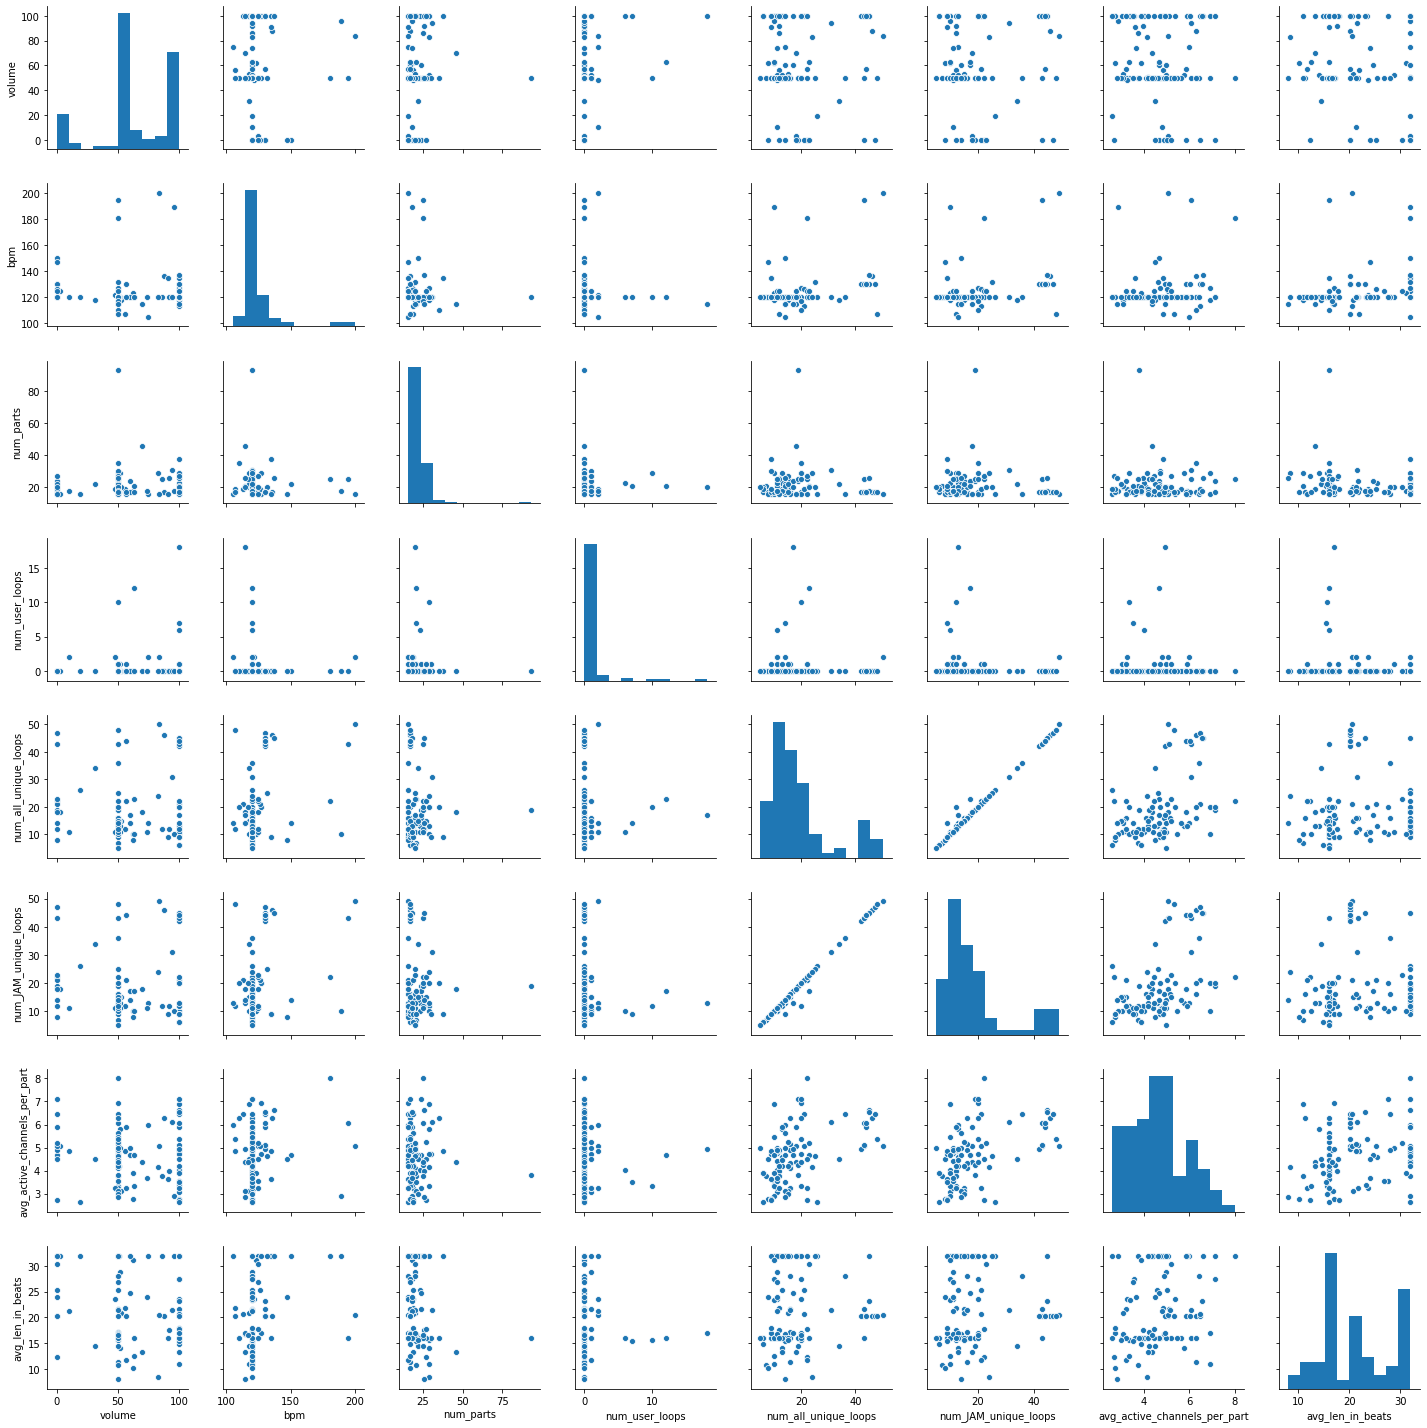

In [24]:
sns.pairplot(all_projects)

# Task 2

In this part, we parse xml files. After checking for loop file names, if the loop exists in the csv files, we drop loop attribute and replace it with the corresponding features.

In [25]:
import xml.etree.ElementTree as ET

In [26]:
def replace_loop(root):

    """
    Use the data in the CSV files to replace the loop filename with 
    the corresponding features (label + d1-d8)
    """
    
    for part in root.findall('parts')[0]:
        for channels in part.findall('channels'):
            for ch in channels.findall('channel'):
                loop_filename= ch.get('loop')
                if 'mmj://styles/id/' in loop_filename:
                    cleaned_loop_filename= 'Mix Packs/'+loop_filename.split('mmj://styles/id/')[1]
                    matching_loop= df[df['Filename'].apply(lambda x: cleaned_loop_filename==x or
                                                                     cleaned_loop_filename+' 1'==x or
                                                                     cleaned_loop_filename+'  1'==x)]
                    # remove an attribute                
                    ch.attrib.pop('loop', None)
                    # add an attribute
                    ch.set('label', str(matching_loop.Label.values[0]))
                    ch.set('d1', str(matching_loop.d1.values[0]))
                    ch.set('d2', str(matching_loop.d2.values[0]))
                    ch.set('d3', str(matching_loop.d3.values[0]))                
                    ch.set('d4', str(matching_loop.d4.values[0]))                
                    ch.set('d5', str(matching_loop.d5.values[0]))                
                    ch.set('d6', str(matching_loop.d6.values[0]))                
                    ch.set('d7', str(matching_loop.d7.values[0]))                
                    ch.set('d8', str(matching_loop.d8.values[0]))                


In [27]:
# create a file path for each xml file
filenames= os.listdir(XML_Projects_path)
for filename in filenames:
    # parse each xml file
    tree = ET.parse(os.path.join(XML_Projects_path,filename))
    root = tree.getroot()
    # replace the loop filename with the corresponding features (label + d1-d8)
    replace_loop(root)
    # create a new XML file with the results
    tree.write(os.path.join('Modified_XMLs',filename))

In [28]:
# check one of the files
with open(os.path.join('Modified_XMLs',filename)) as f:
    newxml = f.read()
BeautifulSoup(newxml, 'xml')

<?xml version="1.0" encoding="utf-8"?>
<project bpm="120" cut_mode="Beat" volume="0">
<used_chords>aa#CdeFG</used_chords>
<user_loops/>
<parts selected_index="0">
<part length_in_beats="32" name="A" pitch="0">
<channels>
<channel d1="0.7044468539127751" d2="0.3316817020744722" d3="0.4834728892300652" d4="0.6409388446438506" d5="0.1821218277032141" d6="0.5712030173479677" d7="0.5159261142101751" d8="0.3545054329051682" is_active="true" label="0.8" volume="50"/>
<channel is_active="false" loop="" volume="50"/>
<channel d1="0.4771891442496605" d2="0.2275681380917339" d3="0.5569573468171594" d4="0.5638118964175842" d5="0.27544370216068303" d6="0.4417033259790313" d7="0.5511353609160762" d8="0.5068254367609935" is_active="true" label="0.8" volume="23"/>
<channel is_active="false" loop="" volume="50"/>
<channel d1="0.7712381718868403" d2="0.37372224776929297" d3="0.4805083076971337" d4="0.9698048619952389" d5="0.35174199267091344" d6="0.5929122293554799" d7="0.5356244462413274" d8="0.4827849

# Task 3

In [29]:
all_projects

project_name  volume  bpm cut_mode  num_parts  \
0   03b5435d-91cd-11e9-99f7-064f3e9f608e.xml      50  120     Beat         29   
1   d87b7042-abe4-11e9-99f7-064f3e9f608e.xml     100  120     Beat         21   
2   aa770847-f0f3-11e9-99f7-064f3e9f608e.xml     100  118     Beat         29   
3   d8abc397-55ad-11e9-99f7-064f3e9f608e.xml      56  107     Beat         19   
4   0d3765c8-1419-11ea-99f7-064f3e9f608e.xml      19  120     Beat         16   
..                                       ...     ...  ...      ...        ...   
95  85a964a5-7501-11e9-99f7-064f3e9f608e.xml      50  107     Beat         17   
96  dee03247-55de-11e9-99f7-064f3e9f608e.xml      50  117     Beat         25   
97  0fb06d29-ea75-11e8-ac46-0679f364d8e4.xml      74  120     Beat         18   
98  e53fb318-73ef-11e9-99f7-064f3e9f608e.xml      50  115     Beat         26   
99  0e460797-b129-11e9-99f7-064f3e9f608e.xml       0  120     Beat         16   

    num_user_loops  num_all_unique_loops  num_JAM_unique_loops  \
0               10                    20                    12   
1                1                    11                    10   
2                0                    10                    10   
3                0                    12                    12   
4                0                    26                    26   
..             ...                   ...                   ...   
95               0                    48                    48   
96               0                    20                    20   
97               0                    11                    11   
98               0                    14                    14   
99               0                    18                    18   

    avg_active_channels_per_part  avg_len_in_beats  
0                           3.34         15.586207  
1                           3.05         16.000000  
2                           6.90         10.896552  
3                           4.84         21.894737  
4                           2.62         32.000000  
..                           ...               ...  
95                          5.35         20.235294  
96                          4.36         16.640000  
97                          3.67         24.000000  
98                          2.85          8.000000  
99                          5.88         32.000000  

[100 rows x 10 columns]

In [30]:
all_projects.describe()

volume         bpm   num_parts  num_user_loops  \
count  100.000000  100.000000  100.000000      100.000000   
mean    61.420000  124.500000   21.480000        0.690000   
std     31.326621   15.260367    8.944814        2.521403   
min      0.000000  105.000000   16.000000        0.000000   
25%     50.000000  120.000000   17.000000        0.000000   
50%     50.500000  120.000000   19.000000        0.000000   
75%    100.000000  125.000000   24.000000        0.000000   
max    100.000000  200.000000   93.000000       18.000000   

       num_all_unique_loops  num_JAM_unique_loops  \
count            100.000000            100.000000   
mean              18.650000             18.350000   
std               11.315829             11.365707   
min                5.000000              5.000000   
25%               11.000000             11.000000   
50%               15.000000             14.500000   
75%               21.000000             20.250000   
max               50.000000             49.000000   

       avg_active_channels_per_part  avg_len_in_beats  
count                     100.00000        100.000000  
mean                        4.65070         21.208671  
std                         1.20124          7.081488  
min                         2.62000          8.000000  
25%                         3.76000         16.000000  
50%                         4.67000         20.235294  
75%                         5.25250         27.666667  
max                         8.00000         32.000000

In [31]:
def plot_dist(series, metric, title, xlabel, ylabel):
    # set seaborn style
    sns.set_style('darkgrid')
    # import gridspec func for subplots with different sizes
    from matplotlib import gridspec
    # creat figure
    fig = plt.figure(figsize=(10, 6)) 
    fig.suptitle('\n'+title,y=1.02, fontsize=20, fontweight='bold')
    # creat 2 subplots
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0)
    # creat ax0 and ax1 for two plots
    ax0 = plt.subplot(gs[0])
    ax0.set_xticks([])
    ax1 = plt.subplot(gs[1])
    # histogram of ROI distribution
    sns.distplot(a=series[metric], ax=ax0, kde=False,color='#49759c')
    ax0.set_xlabel(None)
    # boxplot of ROI distribution
    sns.boxplot(x=metric, data=series, ax=ax1,color='#49759c')
    ax1.set_xlabel(xlabel)
    ax0.set_ylabel(ylabel)
    plt.show()

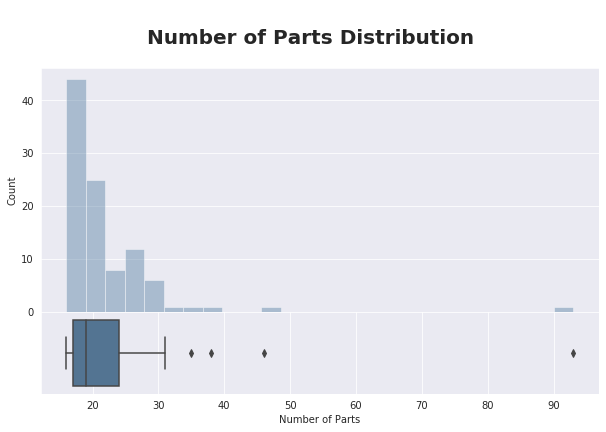

In [32]:
plot_dist(all_projects, metric='num_parts', title='Number of Parts Distribution', 
          xlabel='Number of Parts', ylabel='Count')

Let's get rid of outliers and plot the distribution again:

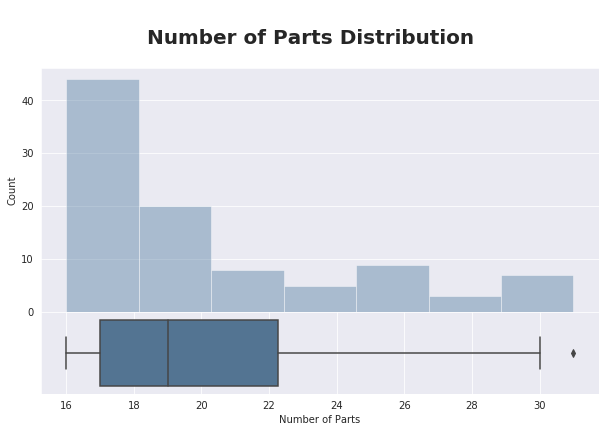

In [33]:
plot_dist(all_projects[all_projects['num_parts']<35], metric='num_parts', title='Number of Parts Distribution', 
          xlabel='Number of Parts', ylabel='Count')

Minimum number of parts is: 16\
mean is: 21.48\
Median is: 19\
The distribution is right skewed.

In [34]:
all_projects['num_parts'].describe()

count    100.000000
mean      21.480000
std        8.944814
min       16.000000
25%       17.000000
50%       19.000000
75%       24.000000
max       93.000000
Name: num_parts, dtype: float64

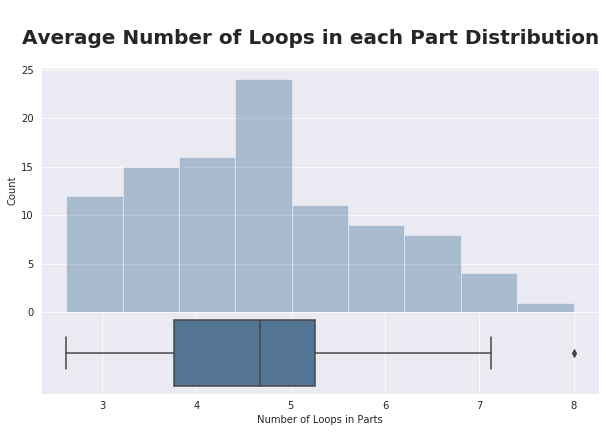

In [35]:
plot_dist(all_projects, metric='avg_active_channels_per_part', 
          title='Average Number of Loops in each Part Distribution', 
          xlabel='Number of Loops in Parts', ylabel='Count')

Distributuin is right-tailed\
median is 4.67

In [36]:
all_projects['avg_active_channels_per_part'].describe()

count    100.00000
mean       4.65070
std        1.20124
min        2.62000
25%        3.76000
50%        4.67000
75%        5.25250
max        8.00000
Name: avg_active_channels_per_part, dtype: float64

In [37]:
# create a dataframe for used loops
loops= pd.DataFrame({'filenames':JAM_loops_lst})
loops['loop']= loops['filenames'].apply(lambda x: x.split('mmj://styles/id/')[1])
loops['mix_pax']= loops['loop'].apply(lambda x: x.split('/')[-3])
loops['instrument']= loops['loop'].apply(lambda x: x.split('/')[-2])
loops['label']= loops['loop'].apply(lambda x: x.split('/')[-1])

In [38]:
# check df
loops.head()

filenames  \
0  mmj://styles/id/ST_Electro_Lite/Glitches/Rocki...   
1  mmj://styles/id/ST_Electro_Lite/Synth/PitchGli...   
2  mmj://styles/id/ST_Loudly_Exclusive/Vocal FX/C...   
3  mmj://styles/id/ST_Electro_Lite/Glitches/Rocki...   
4  mmj://styles/id/ST_Electro_Lite/Synth/PitchGli...   

                                           loop              mix_pax  \
0            ST_Electro_Lite/Glitches/RockinDck      ST_Electro_Lite   
1       ST_Electro_Lite/Synth/PitchGlitch Synth      ST_Electro_Lite   
2  ST_Loudly_Exclusive/Vocal FX/Circular Fury B  ST_Loudly_Exclusive   
3            ST_Electro_Lite/Glitches/RockinDck      ST_Electro_Lite   
4       ST_Electro_Lite/Synth/PitchGlitch Synth      ST_Electro_Lite   

  instrument              label  
0   Glitches          RockinDck  
1      Synth  PitchGlitch Synth  
2   Vocal FX    Circular Fury B  
3   Glitches          RockinDck  
4      Synth  PitchGlitch Synth

In [39]:
# most used loops
loops.loop.value_counts()

ST_Electro_Lite/Synth/PitchGlitch Synth          17
ST_Electro_Lite/Glitches/RockinDck               16
ST_Loudly_Exclusive/Drums/Loudly Build A         14
ST_Electro_Lite/Synth/BoubleWobble               11
ST_Electro_Lite/Glitches/HouseGlitch              8
ST_Electro_Lite/Fx/DelGlitchosLong FX             7
ST_Loudly_Exclusive/Organic/Piano Sigh            6
ST_Loudly_Exclusive/Synths/Middle Ground          6
ST_Loudly_Exclusive/Synths/Crazy Talkin           6
ST_Electro_Lite/Glitches/Psykodelayck One         4
ST_Loudly_Exclusive/Vocal FX/Circular Fury B      3
ST_Loudly_Exclusive/Organic/Weird Cymb B          3
ST_Electro_Lite/Fx/DoerbeDownlifter Pumpin FX     2
ST_Electro_Lite/Chipsounds/JiveGlitch             1
ST_Electro_Lite/Fx/ClassicUplifter FX             1
ST_Loudly_Exclusive/Vocal FX/Eerie Angel A        1
ST_Loudly_Exclusive/Organic/Piano Moan            1
ST_Electro_Lite/Pad/StarlightPad                  1
Name: loop, dtype: int64

In [40]:
print('Total used loops: ',len(JAM_loops_lst))
print('Unique used loops: ',len(set(JAM_loops_lst)))

Total used loops:  108
Unique used loops:  18


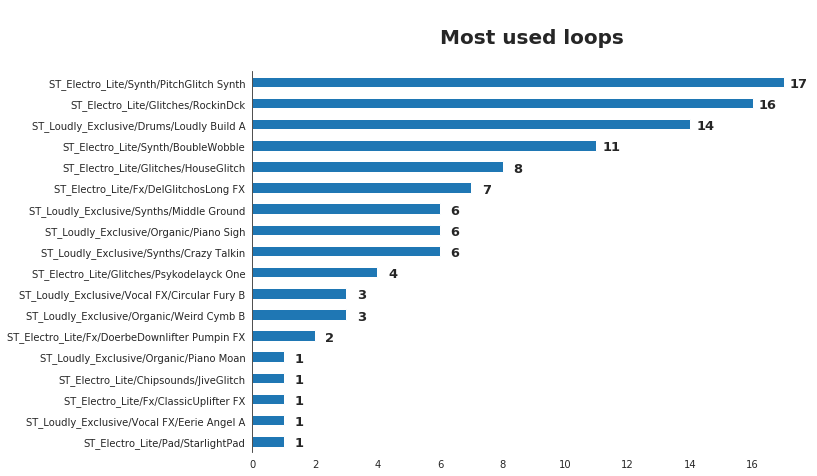

In [41]:
# set background to white
sns.set_style('white')
# bar plot
fig,ax = plt.subplots(nrows=1,ncols=1)
plt.title('\nMost used loops\n',y=1, fontsize=20, fontweight='bold')
g= loops.loop.value_counts().sort_values().plot(kind='barh',figsize=((10,7)))
# function to write each bar value in front of it
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its value."""
    for rect in rects:
        ax.annotate('{}'.format(int(rect.get_width())),
                    xy=(rect.get_width(), rect.get_y()),
                    xytext=(15, -3),  # 3 points vertical offset
                    textcoords="offset points",size=13, fontweight='bold',
                    ha='center', va='bottom')
# apply autolabel func to the bars
autolabel(g.containers[0])
# hide spines
sns.despine(ax=ax, top=True, right=True, left=False, bottom=True)


In [42]:
# most used mix_pack
loops.mix_pax.value_counts()

ST_Electro_Lite        68
ST_Loudly_Exclusive    40
Name: mix_pax, dtype: int64

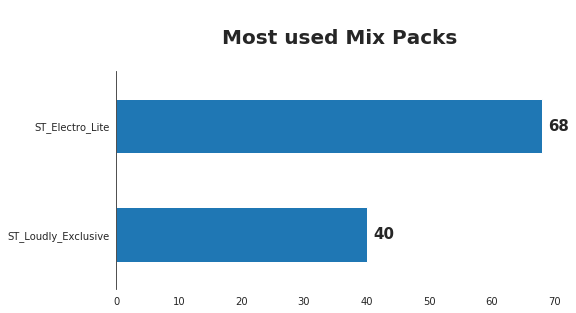

In [43]:
# set background to white
sns.set_style('white')
# bar plot
fig,ax = plt.subplots(nrows=1,ncols=1)
plt.title('\nMost used Mix Packs\n',y=1, fontsize=20, fontweight='bold')
g= loops.mix_pax.value_counts().sort_values().plot(kind='barh',figsize=((8,4)))
# function to write each bar value in front of it
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its value."""
    for rect in rects:
        ax.annotate('{}'.format(int(rect.get_width())),
                    xy=(rect.get_width(), rect.get_y()),
                    xytext=(17, 20),  # 3 points vertical offset
                    textcoords="offset points",size=15, fontweight='bold',
                    ha='center', va='bottom')
# apply autolabel func to the bars
autolabel(g.containers[0])
# hide spines
sns.despine(ax=ax, top=True, right=True, left=False, bottom=True)

In [44]:
# most used instrument
loops.instrument.value_counts()

Glitches      28
Synth         28
Drums         14
Synths        12
Fx            10
Organic       10
Vocal FX       4
Chipsounds     1
Pad            1
Name: instrument, dtype: int64

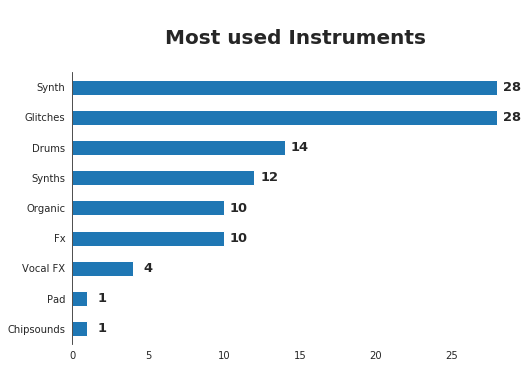

In [45]:
# set background to white
sns.set_style('white')
# bar plot
fig,ax = plt.subplots(nrows=1,ncols=1)
plt.title('\nMost used Instruments\n',y=1, fontsize=20, fontweight='bold')
g= loops.instrument.value_counts().sort_values().plot(kind='barh',figsize=((8,5)))
# function to write each bar value in front of it
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its value."""
    for rect in rects:
        ax.annotate('{}'.format(int(rect.get_width())),
                    xy=(rect.get_width(), rect.get_y()),
                    xytext=(15, 1),  # 3 points vertical offset
                    textcoords="offset points",size=13, fontweight='bold',
                    ha='center', va='bottom')
# apply autolabel func to the bars
autolabel(g.containers[0])
# hide spines
sns.despine(ax=ax, top=True, right=True, left=False, bottom=True)

Two of the most informative statistics are probably **length_in_beats** for parts and **bpm** for the whole project. Because with these we can calculate the duration of the songs (in minutes).


$$Song\ Duration = \frac{\sum Length\ in\ Beats\ for\ all\ parts}{bpm}$$

Let's take a look at our project parts dataframes:

In [46]:
all_project_parts_df[0].head()

part   name pitch length_in_beats  \
0  part 0      A     0              16   
1  part 1  A (1)     0              16   
2  part 2  A (2)     0              16   
3  part 3  A (3)     0              16   
4  part 4  A (4)     0              16   

                                      ch1_loop  ch1_is_user_loop  \
0  mmj://styles/id/ST_House_Lite/Drums/Drake C             False   
1  mmj://styles/id/ST_House_Lite/Drums/Drake A             False   
2  mmj://styles/id/ST_House_Lite/Drums/Drake A             False   
3  mmj://styles/id/ST_House_Lite/Drums/Drake A             False   
4  mmj://styles/id/ST_House_Lite/Drums/Drake A             False   

  ch1_loop_mix_pack ch1_loop_instrument ch1_loop_name  ch1__is_actice  ...  \
0     ST_House_Lite               Drums       Drake C            True  ...   
1     ST_House_Lite               Drums       Drake A            True  ...   
2     ST_House_Lite               Drums       Drake A            True  ...   
3     ST_House_Lite               Drums       Drake A            True  ...   
4     ST_House_Lite               Drums       Drake A            True  ...   

  ch7_loop_name ch7__is_actice  ch7_volume  \
0           NaN          False          50   
1           NaN          False          50   
2           NaN          False          50   
3           NaN          False          50   
4           NaN          False          50   

                                            ch8_loop ch8_is_user_loop  \
0                                                               False   
1  mmj://projects/this/user_loops/id/1a59a58e-20d...             True   
2  mmj://projects/this/user_loops/id/782417bb-5c6...             True   
3  mmj://projects/this/user_loops/id/cd191549-a34...             True   
4                                                               False   

  ch8_loop_mix_pack  ch8_loop_instrument ch8_loop_name ch8__is_actice  \
0               NaN                  NaN           NaN          False   
1               NaN                  NaN           NaN           True   
2               NaN                  NaN           NaN           True   
3               NaN                  NaN           NaN           True   
4               NaN                  NaN           NaN          False   

   ch8_volume  
0          69  
1           0  
2           0  
3           0  
4          50  

[5 rows x 60 columns]

In [47]:
durations=[]
for i in range(100):
    durations.append(all_project_parts_df[i]['length_in_beats'].astype(int).sum()/all_projects.bpm[i])

In [48]:
all_projects['durations']=durations

In [49]:
all_projects.head()

project_name  volume  bpm cut_mode  num_parts  \
0  03b5435d-91cd-11e9-99f7-064f3e9f608e.xml      50  120     Beat         29   
1  d87b7042-abe4-11e9-99f7-064f3e9f608e.xml     100  120     Beat         21   
2  aa770847-f0f3-11e9-99f7-064f3e9f608e.xml     100  118     Beat         29   
3  d8abc397-55ad-11e9-99f7-064f3e9f608e.xml      56  107     Beat         19   
4  0d3765c8-1419-11ea-99f7-064f3e9f608e.xml      19  120     Beat         16   

   num_user_loops  num_all_unique_loops  num_JAM_unique_loops  \
0              10                    20                    12   
1               1                    11                    10   
2               0                    10                    10   
3               0                    12                    12   
4               0                    26                    26   

   avg_active_channels_per_part  avg_len_in_beats  durations  
0                          3.34         15.586207   3.766667  
1                          3.05         16.000000   2.800000  
2                          6.90         10.896552   2.677966  
3                          4.84         21.894737   3.887850  
4                          2.62         32.000000   4.266667

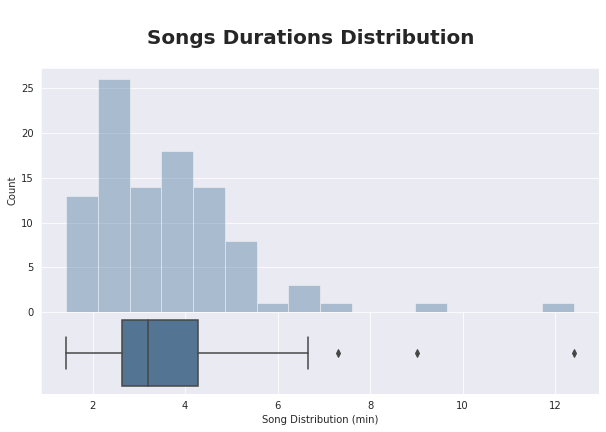

In [50]:
plot_dist(all_projects, metric='durations', 
          title='Songs Durations Distribution', 
          xlabel='Song Distribution (min)', ylabel='Count')

# Task 4

I believe finding a metric to compare songs and projects and finding similarities need some domain knowledge in music and maybe also music industry. In this case, I select the features that I think make the most difference between songs. Then I run a K-Means clustering algorithms to segment them.

In [51]:
from sklearn.cluster import KMeans

In [52]:
clustering_df= all_projects[['bpm','num_parts','num_JAM_unique_loops',
                             'avg_active_channels_per_part','avg_len_in_beats','durations']].copy()

We can use elbow methode to find the optimum number of classes.

Text(0, 0.5, 'Within cluster sum of squares')

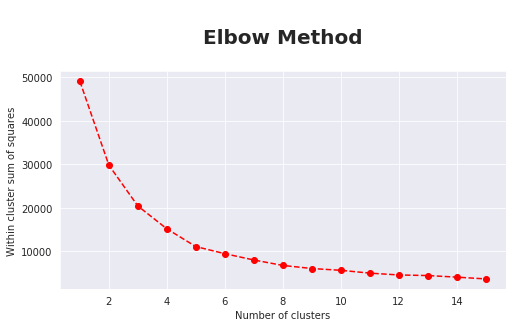

In [53]:
#Elbow methode to find optimum number of clusters
sns.set_style('darkgrid')
wcss=[]
for i in range(1,16):
    kmc= KMeans(n_clusters=i)
    kmc.fit(clustering_df)
    wcss.append(kmc.inertia_)
plt.figure(figsize=(8,4))
plt.plot(list(range(1,16)),wcss,'--ro')
plt.title('\nElbow Method\n',y=1, fontsize=20, fontweight='bold')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')

It looks like 3 is an acceptable cluster numbers.

In [54]:
kmc= KMeans(n_clusters=3)
kmc.fit(clustering_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
clustering_df['clusters']=kmc.labels_
clustering_df['clusters'].value_counts()

2    82
0    14
1     4
Name: clusters, dtype: int64

Let's see how we can interpret our classes:

In [56]:
clustering_df

bpm  num_parts  num_JAM_unique_loops  avg_active_channels_per_part  \
0   120         29                    12                          3.34   
1   120         21                    10                          3.05   
2   118         29                    10                          6.90   
3   107         19                    12                          4.84   
4   120         16                    26                          2.62   
..  ...        ...                   ...                           ...   
95  107         17                    48                          5.35   
96  117         25                    20                          4.36   
97  120         18                    11                          3.67   
98  115         26                    14                          2.85   
99  120         16                    18                          5.88   

    avg_len_in_beats  durations  clusters  
0          15.586207   3.766667         2  
1          16.000000   2.800000         2  
2          10.896552   2.677966         2  
3          21.894737   3.887850         2  
4          32.000000   4.266667         2  
..               ...        ...       ...  
95         20.235294   3.214953         0  
96         16.640000   3.555556         2  
97         24.000000   3.600000         2  
98          8.000000   1.808696         2  
99         32.000000   4.266667         2  

[100 rows x 7 columns]

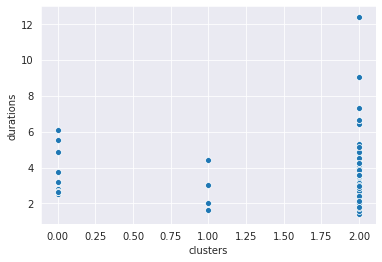

In [57]:
sns.scatterplot(x='clusters',y='durations',data=clustering_df)

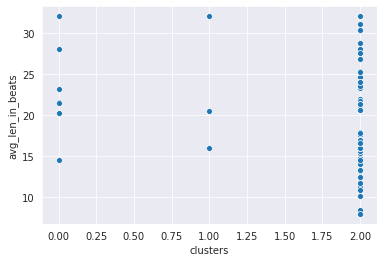

In [58]:
sns.scatterplot(x='clusters',y='avg_len_in_beats',data=clustering_df)

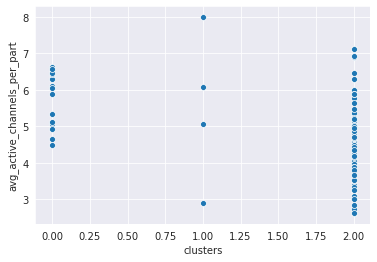

In [59]:
sns.scatterplot(x='clusters',y='avg_active_channels_per_part',data=clustering_df)

It looks like *duration*, *avg_len_in_beats* and *avg_active_channels_per_part* don't have a great impact on the segmentation.

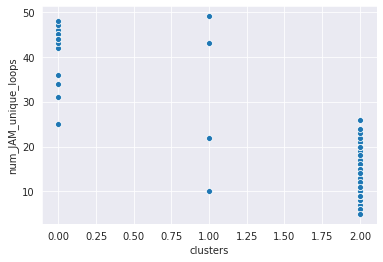

In [60]:
sns.scatterplot(x='clusters',y='num_JAM_unique_loops',data=clustering_df)

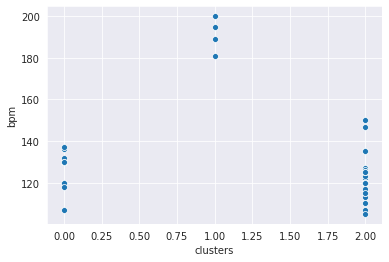

In [61]:
sns.scatterplot(x='clusters',y='bpm',data=clustering_df)

In the other hand, we can put the songs into same clusters, based on **tempo** od the song and **diversity** of loops.

In [62]:
clustering_df.sample(10)

bpm  num_parts  num_JAM_unique_loops  avg_active_channels_per_part  \
0   120         29                    12                          3.34   
44  189         18                    10                          2.89   
81  120         25                    19                          4.24   
95  107         17                    48                          5.35   
28  200         16                    49                          5.06   
15  120         19                    16                          4.26   
75  120         17                    11                          4.88   
58  120         18                    11                          4.83   
30  150         22                    14                          4.68   
72  120         16                    16                          4.31   

    avg_len_in_beats  durations  clusters  
0          15.586207   3.766667         2  
44         32.000000   3.047619         1  
81         14.560000   3.033333         2  
95         20.235294   3.214953         0  
28         20.500000   1.640000         1  
15         17.263158   2.733333         2  
75         16.705882   2.366667         2  
58         21.333333   3.200000         2  
30         32.000000   4.693333         2  
72         32.000000   4.266667         2